In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [18]:
columns = pd.read_csv('columns.txt', delim_whitespace = True)
data = pd.read_csv('haloes_list.txt', delim_whitespace = True, names = list(columns))

In [19]:
data.head()

,scale(0),id(1),desc_scale(2),desc_id(3),num_prog(4),pid(5),upid(6),desc_pid(7),phantom(8),sam_mvir(9),...,Mpeak_Scale(69),Acc_Scale(70),First_Acc_Scale(71),First_Acc_Mvir(72),First_Acc_Vmax(73),Vmax\@Mpeak(74),Tidal_Force_Tdyn(75),Log_(Vmax/Vmax_max(Tdyn;Tmpeak))(76),Time_to_future_merger(77),Future_merger_MMP_ID(78)
0,0.05562,94,0.06012,8598,0,-1,-1,-1,0,7.748000e+08,...,0.05562,0.05562,0.05562,7.748000e+08,57.90,57.90,0.00000,0.0,-1.00000,94
1,0.05562,444,0.06012,7591,0,-1,-1,-1,0,9.298000e+08,...,0.05562,0.05562,0.05562,9.298000e+08,58.34,58.34,0.00000,0.0,0.27501,-1
2,0.05562,60,0.06012,7669,0,-1,-1,-1,0,4.029000e+09,...,0.05562,0.05562,0.05562,4.029000e+09,93.26,93.26,0.00000,0.0,-1.00000,60
3,0.05562,61,0.06012,7672,0,-1,-1,-1,0,2.634000e+09,...,0.05562,0.05562,0.05562,2.634000e+09,80.18,80.18,0.16957,0.0,0.47444,60
4,0.05562,757,0.06012,7716,0,-1,-1,-1,0,4.649000e+09,...,0.05562,0.05562,0.05562,4.649000e+09,120.10,120.10,0.00000,0.0,-1.00000,757


<AxesSubplot:xlabel='mvir(10)', ylabel='Count'>

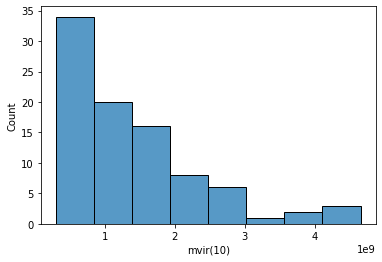

In [21]:
sns.histplot(data = data, x = 'mvir(10)')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 79 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   scale(0)                              90 non-null     float64
 1   id(1)                                 90 non-null     int64  
 2   desc_scale(2)                         90 non-null     float64
 3   desc_id(3)                            90 non-null     int64  
 4   num_prog(4)                           90 non-null     int64  
 5   pid(5)                                90 non-null     int64  
 6   upid(6)                               90 non-null     int64  
 7   desc_pid(7)                           90 non-null     int64  
 8   phantom(8)                            90 non-null     int64  
 9   sam_mvir(9)                           90 non-null     float64
 10  mvir(10)                              90 non-null     float64
 11  rvir(11)             

In [37]:
2.5*(10**9)

2500000000.0

In [38]:
data['mvir(10)'] >= (2.5*(10**9))

0     False
1     False
2      True
3      True
4      True
      ...  
85     True
86    False
87    False
88    False
89     True
Name: mvir(10), Length: 90, dtype: bool

In [43]:
data['mass_bool'] = data['mvir(10)'].apply(lambda x: 0 if x <= 1.5*(10**9) else 1)
data.mass_bool.value_counts(normalize = True)

0    0.611111
1    0.388889
Name: mass_bool, dtype: float64

In [44]:
target = data['mass_bool']
predictors = data[['rvir(11)','rs(12)','vrms(13)','vmax(16)','vx(20)','vy(21)','vz(22)',
                   'T/|U|(56)','Acc_Rate_Inst(64)']]

In [45]:
data_train, data_test, target_train, target_test = train_test_split(predictors, target, 
                                                                    test_size = 0.25, random_state=123)

In [46]:
forest = RandomForestClassifier(max_depth = 5)
forest.fit(data_train, target_train)

RandomForestClassifier(max_depth=5)

In [47]:
forest.score(data_train, target_train)

1.0

In [49]:
forest.score(data_test, target_test)

1.0

In [50]:
forest.estimators_[0]

DecisionTreeClassifier(max_depth=5, max_features='auto',
                       random_state=1804458789)

In [51]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

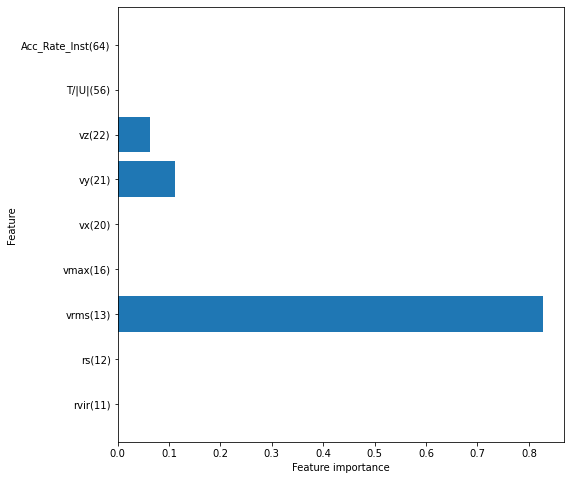

In [73]:
plot_feature_importances(forest.estimators_[7])

In [55]:
forest.estimators_[2]

DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=985553863)

In [63]:
feat_imps = forest.feature_importances_
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

<AxesSubplot:>

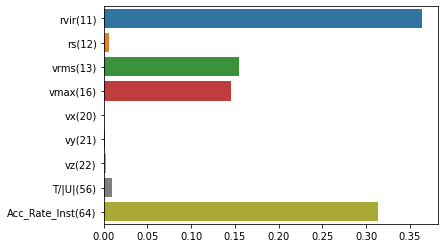

In [84]:
sns.barplot(x = forest.feature_importances_, y = predictors.columns)

[Text(133.92000000000002, 190.26, 'vrms(13) <= 48.355\ngini = 0.46\nsamples = 47\nvalue = [43, 24]'),
 Text(66.96000000000001, 135.9, 'gini = 0.0\nsamples = 28\nvalue = [40, 0]'),
 Text(200.88000000000002, 135.9, 'vy(21) <= 131.64\ngini = 0.198\nsamples = 19\nvalue = [3, 24]'),
 Text(133.92000000000002, 81.53999999999999, 'vz(22) <= 170.85\ngini = 0.077\nsamples = 18\nvalue = [1, 24]'),
 Text(66.96000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 17\nvalue = [0, 24]'),
 Text(200.88000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 81.53999999999999, 'gini = 0.0\nsamples = 1\nvalue = [2, 0]')]

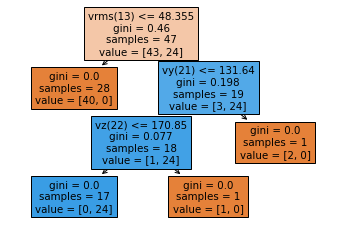

In [86]:
tree.plot_tree(forest.estimators_[7], feature_names = predictors.columns, filled = True)

In [81]:
predictors.columns

Index(['rvir(11)', 'rs(12)', 'vrms(13)', 'vmax(16)', 'vx(20)', 'vy(21)',
       'vz(22)', 'T/|U|(56)', 'Acc_Rate_Inst(64)'],
      dtype='object')